In [ ]:
import sys
print(sys.version)
%pwd
#git clone https://github.com/fastai/fastai.git
#cd fastai
#conda env update
#conda activate fastai

In [3]:
!pip install fastai
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.structured import *
from fastai.column_data import *
PATH = 'data/'

C:\Users\chrun\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
#!pip install kaggle

#from googleapiclient.discovery import build
#import io, os
#from googleapiclient.http import MediaIoBaseDownload
#from google.colab import auth
#auth.authenticate_user()

#!mkdir -p ~/.kaggle
#!mv kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

#!mkdir data

In [ ]:
#!kaggle competitions download -c house-prices-advanced-regression-techniques --force

In [ ]:
#!mv sample_submission.csv data
#!mv data_description.txt data
#!mv test.csv data
#!mv train.csv data

In [ ]:
#!rm -rf sample_submission.csv.gz
#!rm -rf test.csv.gz
#!rm -rf train.csv.gz

In [ ]:
'''
def load_df(csv_path='data/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df
'''

In [ ]:
df_train = load_df()
#df_large = load_df(nrows=500000)
#df_test = load_df("data/test.csv")

In [ ]:
#df_train.to_csv("train-flattened-large.csv", index=False)
#df_test.to_csv("test-flattened-large.csv", index=False)

In [ ]:
len(df_train[df_train['fullVisitorId'].duplicated()])

In [69]:
PATH = 'data/'

In [70]:
pd.read_csv(PATH + 'sample_submission.csv').head()

,fullVisitorId,PredictedLogRevenue
0,0000000259678714014,0.0
1,0000049363351866189,0.0
2,0000053049821714864,0.0
3,0000059488412965267,0.0
4,0000085840370633780,0.0


In [71]:
from IPython.display import HTML, display
table_names = ['train-flattened-large', 'test-flattened']
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

for t in tables: display(t.head())

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,20171016,2314544520795440038,2314544520795440038_1508217442,Not Socially Engaged,1508217442,1,1508217442,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


In [72]:
train, test = tables

In [ ]:
len(train),len(test)

In [ ]:
train.head()

In [ ]:
train.head().T.head(82)

In [ ]:
#from pandas.io.json import json_normalize

In [ ]:
len(train.columns), len(test.columns)

In [ ]:
train.nunique()

In [ ]:
df = train
test_df = test

In [ ]:
for v in df.columns: 
    if df[v].nunique() <= 1: 
        df.drop(v, axis=1, inplace=True)
        if v in test_df.columns:
            test_df.drop(v, axis=1, inplace=True)
#23

In [ ]:
df.nunique(), test_df.nunique()

In [ ]:
len(df.columns), len(test_df.columns)

In [ ]:
df.isna().any()

In [ ]:
#DataFrameSummary(df).summary()

In [ ]:
df.info()

In [ ]:
df['totals.transactionRevenue'] = df['totals.transactionRevenue'].astype(float)
#df[['totals.transactionRevenue']] = df[['totals.transactionRevenue']].fillna(value=0)
df['totals.transactionRevenue'].min(), df['totals.transactionRevenue'].max()

In [ ]:
df['channelGrouping'] = df['channelGrouping'].astype(str) #cat
df['totals.hits'] = df['totals.hits'].astype(float) #cont
df['totals.pageviews'] = df['totals.pageviews'].astype(float) #cont
df['trafficSource.adContent'] = df['trafficSource.adContent'].astype(str) #cat

df['trafficSource.adwordsClickInfo.adNetworkType'] = df['trafficSource.adwordsClickInfo.adNetworkType'].astype(str) #cat
df['trafficSource.adwordsClickInfo.gclId'] = df['trafficSource.adwordsClickInfo.gclId'].astype(str) #cat
df['trafficSource.adwordsClickInfo.page'] = df['trafficSource.adwordsClickInfo.page'].astype(float) #cat
df['trafficSource.adwordsClickInfo.slot'] = df['trafficSource.adwordsClickInfo.slot'].astype(str) #cat
df['trafficSource.campaign'] = df['trafficSource.campaign'].astype(str) #cat
df['trafficSource.keyword'] = df['trafficSource.keyword'].astype(str) #cat
df['trafficSource.medium'] = df['trafficSource.medium'].astype(str) #cat
df['trafficSource.referralPath'] = df['trafficSource.referralPath'].astype(str) #cat
df['trafficSource.medium'] = df['trafficSource.medium'].astype(str) #cat
df['trafficSource.source'] = df['trafficSource.source'].astype(str) #cat

df['device.browser'] = df['device.browser'].astype(str) #cat
df['device.deviceCategory'] = df['device.deviceCategory'].astype(str) #cat
df['device.isMobile'] = df['device.isMobile'].astype(bool) #cat
df['device.operatingSystem'] = df['device.operatingSystem'].astype(str) #cat

df['geoNetwork.city'] = df['geoNetwork.city'].astype(str) #cat
df['geoNetwork.continent'] = df['geoNetwork.continent'].astype(str) #cat
df['geoNetwork.country'] = df['geoNetwork.country'].astype(str) #cat
df['geoNetwork.metro'] = df['geoNetwork.metro'].astype(str) #cat
df['geoNetwork.networkDomain'] = df['geoNetwork.networkDomain'].astype(str) #cat
df['geoNetwork.region'] = df['geoNetwork.region'].astype(str) #cat
df['geoNetwork.subContinent'] = df['geoNetwork.subContinent'].astype(str) #cat

df['fullVisitorId'] = df['fullVisitorId'].astype(str) #cat
df['visitId'] = df['visitId'].astype(str) #cat

In [ ]:
test_df['totals.transactionRevenue'] = 0
test_df['totals.transactionRevenue'] = test_df['totals.transactionRevenue'].astype(float)
test_df['channelGrouping'] = test_df['channelGrouping'].astype(str) #cat
test_df['totals.hits'] = test_df['totals.hits'].astype(float) #cont
test_df['totals.pageviews'] = test_df['totals.pageviews'].astype(float) #cont
test_df['trafficSource.adContent'] = test_df['trafficSource.adContent'].astype(str) #cat

test_df['trafficSource.adwordsClickInfo.adNetworkType'] = test_df['trafficSource.adwordsClickInfo.adNetworkType'].astype(str) #cat
test_df['trafficSource.adwordsClickInfo.gclId'] = test_df['trafficSource.adwordsClickInfo.gclId'].astype(str) #cat
test_df['trafficSource.adwordsClickInfo.page'] = test_df['trafficSource.adwordsClickInfo.page'].astype(float) #cat
test_df['trafficSource.adwordsClickInfo.slot'] = test_df['trafficSource.adwordsClickInfo.slot'].astype(str) #cat
test_df['trafficSource.campaign'] = test_df['trafficSource.campaign'].astype(str) #cat
test_df['trafficSource.keyword'] = test_df['trafficSource.keyword'].astype(str) #cat
test_df['trafficSource.medium'] = test_df['trafficSource.medium'].astype(str) #cat
test_df['trafficSource.referralPath'] = test_df['trafficSource.referralPath'].astype(str) #cat
test_df['trafficSource.medium'] = test_df['trafficSource.medium'].astype(str) #cat
test_df['trafficSource.source'] = test_df['trafficSource.source'].astype(str) #cat

test_df['device.browser'] = test_df['device.browser'].astype(str) #cat
test_df['device.deviceCategory'] = test_df['device.deviceCategory'].astype(str) #cat
test_df['device.isMobile'] = test_df['device.isMobile'].astype(bool) #cat
test_df['device.operatingSystem'] = test_df['device.operatingSystem'].astype(str) #cat

test_df['geoNetwork.city'] = test_df['geoNetwork.city'].astype(str) #cat
test_df['geoNetwork.continent'] = test_df['geoNetwork.continent'].astype(str) #cat
test_df['geoNetwork.country'] = test_df['geoNetwork.country'].astype(str) #cat
test_df['geoNetwork.metro'] = test_df['geoNetwork.metro'].astype(str) #cat
test_df['geoNetwork.networkDomain'] = test_df['geoNetwork.networkDomain'].astype(str) #cat
test_df['geoNetwork.region'] = test_df['geoNetwork.region'].astype(str) #cat
test_df['geoNetwork.subContinent'] = test_df['geoNetwork.subContinent'].astype(str) #cat

test_df['fullVisitorId'] = test_df['fullVisitorId'].astype(str) #cat
test_df['visitId'] = test_df['visitId'].astype(str) #cat

In [ ]:
# checked datatype of each column and if it's categorical
#df['geoNetwork.subContinent'].unique() 

In [ ]:
df['date'] = pd.to_datetime(train['date'], format="%Y%m%d")
test_df['date'] = pd.to_datetime(train['date'], format="%Y%m%d")

In [ ]:
df['date'].head(), test_df['date'].head()

In [ ]:
add_datepart(df, "date", drop=False)
add_datepart(test_df, "date", drop=False)

In [ ]:
len(df.columns), len(test_df.columns)

In [ ]:
df.columns

In [ ]:
test_df.columns

In [ ]:
#pd.set_option('display.max_columns', 500)
#DataFrameSummary(df).summary()

In [ ]:
train_df.head()

In [ ]:
test_df.columns.duplicated()

In [ ]:
train_df.to_pickle("train_df")
test_df.to_pickle("test_df")

# New Entry point with flattened dataframe

In [4]:
cat_vars = ['channelGrouping',  #'fullVisitorId', 'sessionId', 'visitId',
            'trafficSource.adwordsClickInfo.adNetworkType',
            'trafficSource.adwordsClickInfo.gclId', 
            'trafficSource.adwordsClickInfo.page', 'trafficSource.adContent', 
            'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
            'trafficSource.keyword', 'trafficSource.medium',
            'trafficSource.referralPath', 'trafficSource.source', 'device.browser',
            'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
            'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
            'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
            'geoNetwork.subContinent']

contin_vars = ['visitNumber', 'visitStartTime', 'totals.hits', 'totals.pageviews']



In [5]:
train_df = pd.read_csv("data/train-flattened-large.csv", low_memory=False)
test_df = pd.read_csv("data/test-flattened.csv", low_memory=False)

In [8]:
train_df['visitStartTime']

#this should be converted into date probably or be extracted seperatly

0         1472830385
1         1472880147
2         1472865386
3         1472881213
4         1472822600
5         1472807194
6         1472817241
7         1472812602
8         1472805784
9         1472812272
10        1472834967
11        1472849434
12        1472839882
13        1472803483
14        1472868337
15        1472824614
16        1472801099
17        1472826820
18        1472804607
19        1472856874
20        1472826420
21        1472863754
22        1472872530
23        1472808484
24        1472806593
25        1472816048
26        1472808002
27        1472885255
28        1472828340
29        1472839261
             ...    
903623    1483525429
903624    1483573406
903625    1483580548
903626    1483555912
903627    1483518594
903628    1483520492
903629    1483534287
903630    1483593323
903631    1483535458
903632    1483533556
903633    1483550538
903634    1483534920
903635    1483556696
903636    1483561580
903637    1483548841
903638    1483533179
903639    148

In [9]:
dep = 'totals.transactionRevenue'
test_df[dep] = 0

In [10]:
train_df = train_df[cat_vars + contin_vars + [dep, 'date']].copy()

In [11]:
test_df = test_df[cat_vars + contin_vars + [dep, 'date', 'fullVisitorId']].copy()

In [12]:
len(test_df)

804684

In [13]:
#for v in cat_vars: train_df[v] = train_df[v].fillna(-999).astype('category').cat.as_ordered()
#for v in cat_vars: test_df[v] = test_df[v].fillna(-999).astype('category').cat.as_ordered()

for v in cat_vars: train_df[v] = train_df[v].astype('category').cat.as_ordered()

In [14]:
apply_cats(test_df, train_df)

In [15]:
!pip install scikit-learn
from sklearn.preprocessing import Imputer

In [16]:
for v in contin_vars:
    train_df[v] = train_df[v].astype('float32')
    test_df[v] = test_df[v].astype('float32')
    
imputer = Imputer()
#values = train_df[contin_vars].values
train_df[contin_vars] = imputer.fit_transform(train_df[contin_vars])
#values = test_df[contin_vars].values
test_df[contin_vars] = imputer.fit_transform(test_df[contin_vars])

    
train_df[dep] = train_df[dep].astype('float32')

In [17]:
train_df['date'] = pd.to_datetime(train_df['date'], format="%Y%m%d")
test_df['date'] = pd.to_datetime(test_df['date'], format="%Y%m%d")

add_datepart(train_df, "date", drop=False)
add_datepart(test_df, "date", drop=False)

In [18]:
#idxs = get_cv_idxs(n, val_pct=150000/n)
#train_indexed = train_df.iloc[idxs].set_index("date")
#samp_size = len(train_indexed); samp_size

train_df = train_df.sort_values(by='date') 
test_df = test_df.sort_values(by='date')

train_indexed = train_df.set_index("date")
samp_size = len(train_indexed); samp_size

903653

In [19]:
train_indexed['totals.transactionRevenue'] = train_indexed['totals.transactionRevenue'].fillna(0)

In [20]:
train_indexed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 903653 entries, 2016-08-01 to 2017-08-01
Data columns (total 40 columns):
channelGrouping                                 903653 non-null category
trafficSource.adwordsClickInfo.adNetworkType    21460 non-null category
trafficSource.adwordsClickInfo.gclId            21561 non-null category
trafficSource.adwordsClickInfo.page             21460 non-null category
trafficSource.adContent                         10946 non-null category
trafficSource.adwordsClickInfo.slot             21460 non-null category
trafficSource.campaign                          903653 non-null category
trafficSource.keyword                           400724 non-null category
trafficSource.medium                            903653 non-null category
trafficSource.referralPath                      330941 non-null category
trafficSource.source                            903653 non-null category
device.browser                                  903653 non-null category
de

In [21]:
df, y, nas, mapper = proc_df(train_indexed, 'totals.transactionRevenue', do_scale=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 903653 entries, 2016-08-01 to 2017-08-01
Data columns (total 39 columns):
channelGrouping                                 903653 non-null int8
trafficSource.adwordsClickInfo.adNetworkType    903653 non-null int8
trafficSource.adwordsClickInfo.gclId            903653 non-null int16
trafficSource.adwordsClickInfo.page             903653 non-null int8
trafficSource.adContent                         903653 non-null int8
trafficSource.adwordsClickInfo.slot             903653 non-null int8
trafficSource.campaign                          903653 non-null int8
trafficSource.keyword                           903653 non-null int16
trafficSource.medium                            903653 non-null int8
trafficSource.referralPath                      903653 non-null int16
trafficSource.source                            903653 non-null int16
device.browser                                  903653 non-null int8
device.deviceCategory                    

In [23]:
test_indexed = test_df.set_index("date")

In [24]:
df_test, _, nas, mapper = proc_df(test_indexed, 'totals.transactionRevenue', do_scale=True, 
                                  skip_flds=['fullVisitorId'], mapper=mapper, na_dict=nas)

In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 804684 entries, 2017-08-02 to 2018-04-30
Data columns (total 39 columns):
channelGrouping                                 804684 non-null int8
trafficSource.adwordsClickInfo.adNetworkType    804684 non-null int8
trafficSource.adwordsClickInfo.gclId            804684 non-null int16
trafficSource.adwordsClickInfo.page             804684 non-null int8
trafficSource.adContent                         804684 non-null int8
trafficSource.adwordsClickInfo.slot             804684 non-null int8
trafficSource.campaign                          804684 non-null int8
trafficSource.keyword                           804684 non-null int16
trafficSource.medium                            804684 non-null int8
trafficSource.referralPath                      804684 non-null int16
trafficSource.source                            804684 non-null int16
device.browser                                  804684 non-null int8
device.deviceCategory                    

In [26]:
df_test

,channelGrouping,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adContent,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
date,,,,,,,,,,,,,,,,,,,,,
2017-08-02,5,0,0,0,0,0,1,12,6,0,...,-1.552367,-0.381107,0.154270,-0.187999,-0.192539,-0.09617,-0.089437,-0.036632,-0.038881,1.850289
2017-08-02,8,0,0,0,0,0,1,0,7,1426,...,-1.552367,-0.381107,0.154270,-0.187999,-0.192539,-0.09617,-0.089437,-0.036632,-0.038881,1.850289
2017-08-02,8,0,0,0,0,0,1,0,7,941,...,-1.552367,-0.381107,0.154270,-0.187999,-0.192539,-0.09617,-0.089437,-0.036632,-0.038881,1.850289
2017-08-02,8,0,0,0,0,0,1,0,7,871,...,-1.552367,-0.381107,0.154270,-0.187999,-0.192539,-0.09617,-0.089437,-0.036632,-0.038881,1.850289
2017-08-02,8,0,0,0,0,0,1,0,7,928,...,-1.552367,-0.381107,0.154270,-0.187999,-0.192539,-0.09617,-0.089437,-0.036632,-0.038881,1.850289
2017-08-02,8,0,0,0,0,0,1,0,7,1343,...,-1.552367,-0.381107,0.154270,-0.187999,-0.192539,-0.09617,-0.089437,-0.036632,-0.038881,1.850289
2017-08-02,8,0,0,0,0,0,1,0,7,1353,...,-1.552367,-0.381107,0.154270,-0.187999,-0.192539,-0.09617,-0.089437,-0.036632,-0.038881,1.850289
2017-08-02,8,0,0,0,0,0,1,0,7,1353,...,-1.552367,-0.381107,0.154270,-0.187999,-0.192539,-0.09617,-0.089437,-0.036632,-0.038881,1.850289
2017-08-02,8,0,0,0,0,0,1,0,7,771,...,-1.552367,-0.381107,0.154270,-0.187999,-0.192539,-0.09617,-0.089437,-0.036632,-0.038881,1.850289


In [27]:
df.head()

,channelGrouping,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adContent,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
date,,,,,,,,,,,,,,,,,,,,,
2016-08-01,3,0,0,0,0,0,1,0,1,0,...,-1.665698,-1.417876,0.15427,-0.187999,5.19376,-0.09617,-0.089437,-0.036632,-0.038881,-1.654703
2016-08-01,3,0,0,0,0,0,1,0,1,0,...,-1.665698,-1.417876,0.15427,-0.187999,5.19376,-0.09617,-0.089437,-0.036632,-0.038881,-1.654703
2016-08-01,7,0,0,0,0,0,1,0,7,1,...,-1.665698,-1.417876,0.15427,-0.187999,5.19376,-0.09617,-0.089437,-0.036632,-0.038881,-1.654703
2016-08-01,3,0,0,0,0,0,1,0,1,0,...,-1.665698,-1.417876,0.15427,-0.187999,5.19376,-0.09617,-0.089437,-0.036632,-0.038881,-1.654703
2016-08-01,3,0,0,0,0,0,1,0,1,0,...,-1.665698,-1.417876,0.15427,-0.187999,5.19376,-0.09617,-0.089437,-0.036632,-0.038881,-1.654703


In [28]:
train_ratio = 0.8
train_size = int(samp_size * train_ratio)
val_idx = list(range(train_size, len(df))); len(val_idx)

180731

In [52]:
n = len(df)
samp_size = n

In [49]:
from sklearn.metrics import mean_squared_error

def exp_rmse(y_pred, targ):
    return math.sqrt(mean_squared_error(targ, y_pred))

In [79]:
#yp = y + 1
#yp[yp == 0] = 1e-5

In [30]:
y

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [31]:
yl = np.log(y + 1)

In [32]:
len(np.unique(yl))

5333

In [33]:
yl

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [34]:
max_y = np.max(yl)

In [35]:
y_range = (0, max_y*1.2)

In [36]:
len(val_idx), len(yl)

(180731, 903653)

In [37]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl, cat_flds=cat_vars, bs=256, test_df=df_test)

In [38]:
cat_sz = [(c, len(train_df[c].cat.categories)+1) for c in cat_vars]

In [39]:
cat_sz

[('channelGrouping', 9),
 ('trafficSource.adwordsClickInfo.adNetworkType', 3),
 ('trafficSource.adwordsClickInfo.gclId', 17775),
 ('trafficSource.adwordsClickInfo.page', 9),
 ('trafficSource.adContent', 45),
 ('trafficSource.adwordsClickInfo.slot', 3),
 ('trafficSource.campaign', 11),
 ('trafficSource.keyword', 3660),
 ('trafficSource.medium', 8),
 ('trafficSource.referralPath', 1476),
 ('trafficSource.source', 381),
 ('device.browser', 55),
 ('device.deviceCategory', 4),
 ('device.isMobile', 3),
 ('device.operatingSystem', 21),
 ('geoNetwork.city', 650),
 ('geoNetwork.continent', 7),
 ('geoNetwork.country', 223),
 ('geoNetwork.metro', 95),
 ('geoNetwork.networkDomain', 28065),
 ('geoNetwork.region', 377),
 ('geoNetwork.subContinent', 24)]

In [40]:
emb_szs = [(c, max(10, min(50, (c+1)//2))) for _,c in cat_sz]

In [41]:
emb_szs

[(9, 10),
 (3, 10),
 (17775, 50),
 (9, 10),
 (45, 23),
 (3, 10),
 (11, 10),
 (3660, 50),
 (8, 10),
 (1476, 50),
 (381, 50),
 (55, 28),
 (4, 10),
 (3, 10),
 (21, 11),
 (650, 50),
 (7, 10),
 (223, 50),
 (95, 48),
 (28065, 50),
 (377, 50),
 (24, 12)]

In [42]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [2000,1000,500], [0.001,0.005,0.01], y_range=y_range)

In [43]:
m.lr_find()

epoch      trn_loss   val_loss                                                                                         
    0      3.980009   4.601431  



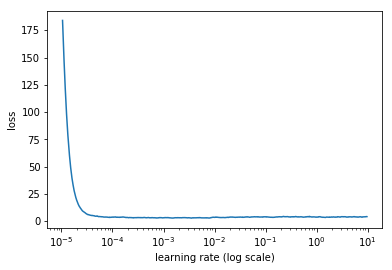

In [44]:
m.sched.plot()

In [45]:
lr = 10**-4.8 

In [46]:
lr

1.584893192461114e-05

In [53]:
m.fit(lr, 1, cycle_len = 3, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      3.057822   3.498919   1.34673   
    1      2.602212   3.312154   1.294292                                                                              
    2      2.73       3.284597   1.284866                                                                              



[array([3.2846]), 1.2848661954839125]

In [54]:
m.save("customer_revenue_3e")

In [ ]:
m.load("customer_revenue_3e")

In [55]:
m.fit(lr, 2, cycle_len = 3, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      2.785883   3.092463   1.218352  
    1      2.599444   3.042772   1.203292                                                                              
    2      2.727221   3.03206    1.203313                                                                              
    3      2.50304    3.12152    1.215232                                                                              
    4      2.514186   3.006713   1.192694                                                                              
    5      2.527635   3.040422   1.201879                                                                              



[array([3.04042]), 1.2018787387318544]

In [56]:
m.save("customer_revenue_6e")

In [60]:
m.load("customer_revenue_6e")

In [57]:
m.fit(lr, 2, cycle_len = 3, cycle_mult = 2, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      2.412238   3.210619   1.236807  
    1      2.537002   2.997675   1.190662                                                                              
    2      2.614797   3.040669   1.199518                                                                              
    3      2.447237   2.95022    1.178466                                                                              
    4      2.551501   3.002719   1.187212                                                                              
    5      2.677831   2.989626   1.183971                                                                              
    6      2.588423   3.008725   1.187326                                                                              
    7      2.416842   3.110365   1.209669                                                                           

[array([3.06085]), 1.1986141143227176]

In [62]:
m.save("customer_revenue_6e_14ER")

In [61]:
m.fit(lr, 1, cycle_len = 4, cycle_mult = 1, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      2.652302   3.072626   1.208608  
    1      2.573498   3.016146   1.194828                                                                              
    2      2.573022   2.98863    1.187311                                                                              
    3      2.738768   3.019438   1.193642                                                                              



[array([3.01944]), 1.1936420329284503]

In [ ]:
m.save("customer_revenue_6e_14ER_28ER")

# Test Set

In [73]:
x,y=m.predict_with_targs()
x = torch.from_numpy(x)
y = torch.from_numpy(y)
exp_rmse(x,y)

#pred_test=m.predict(True)

1.7376529543948045

In [74]:
log_preds = m.predict(True)

In [75]:
log_preds

array([[0.00012],
       [0.00004],
       [0.00004],
       ...,
       [0.     ],
       [0.     ],
       [0.     ]], dtype=float32)

In [76]:
log_test = log_preds 

In [77]:
log_test

array([[0.00012],
       [0.00004],
       [0.00004],
       ...,
       [0.     ],
       [0.     ],
       [0.     ]], dtype=float32)

In [80]:
test['PredictedLogRevenue'] = np.exp(log_test)-1

In [81]:
test.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,PredictedLogRevenue
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google,0.000120
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,0.000035
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,0.000040
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,0.000120
4,Organic Search,20171016,2314544520795440038,2314544520795440038_1508217442,Not Socially Engaged,1508217442,1,1508217442,Safari,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,0.000225


In [82]:
len(test['fullVisitorId'].unique())

617242

In [83]:
test_grouped = test.groupby(['fullVisitorId'], as_index=False).agg({'PredictedLogRevenue':'sum'})

In [84]:
csv_fn=f'{PATH}submission.csv'

test_grouped[['fullVisitorId','PredictedLogRevenue']].to_csv(csv_fn, index=False)

In [85]:
test_grouped

,fullVisitorId,PredictedLogRevenue
0,0000000259678714014,4.320145e-04
1,0000049363351866189,6.008148e-05
2,0000053049821714864,7.212162e-05
3,0000059488412965267,3.759861e-04
4,0000085840370633780,8.404255e-05
5,0000091131414287111,1.943111e-05
6,0000117255350596610,4.768372e-07
7,0000118334805178127,2.825260e-05
8,0000130646294093000,2.384186e-07
9,0000150005271820273,6.198883e-06
